In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import array

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import os

In [14]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv")
data.head(2)

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True


In [15]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'hotelId', 'hotelName', 'tripType',
       'tripTypeText', 'reviewDate', 'rating', 'description', 'isKorNot'],
      dtype='object')

In [16]:
data = data[['rating', 'description']]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       75000 non-null  float64
 1   description  75000 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.1+ MB


* rating 8 이상이면 긍정 1, 미만은 부정 0 으로 해서 target 컬럼 생성
* description컬럼 토크나이징, 시퀀스로 변환, 임베딩
* train, valid, test로 데이터 분할
* 딥러닝 네트워크 생성 후 분석
* early_stopping, modelcheckpoint 
* 그래프로 loss 출력

In [18]:
data.head(2)

,rating,description
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...


In [19]:
data['target'] = data['rating'].apply(lambda x: 1 if x >=8 else 0)

In [20]:
data.head()

,rating,description,target
0,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,1
1,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,1
2,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,1
3,10.0,가격에 맞게 만족했습니다,1
4,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,1


In [21]:
type(data['description']) # 리스트, np.array

pandas.core.series.Series

In [24]:
text = data['description'][0]

In [25]:
result = text_to_word_sequence(data['description'][0])
print("원문: ", text)
print("토큰화: ", result) #토큰, 코퍼스(corpus)

원문:  직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비해 약간 부족합니다
토큰화:  ['직원들', '서비스나', '마인드', '완벽합니다', '다만', '노후된', '시설과', '좁은', '라운지가', '호텔', '이름에', '비해', '약간', '부족합니다']


In [26]:
# 단어 빈도수 세기
docs = data['description']

# 토크나이저 사용법

In [27]:
# 문장 토큰화 하기
token = Tokenizer(lower=False)
token.fit_on_texts(docs)

In [28]:
print('단어 카운트: ', token.word_counts)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
print('문장 카운트:', token.document_count)

문장 카운트: 75000


In [30]:
print('각 단어가 몇 개의 문장에 포함되어 있는가? ', token.word_docs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
print('각 단어에 매겨진 인덱스:', token.word_index)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
len(token.word_index)

261893

# 단어의 원-핫 인코딩

In [33]:
text = data['description'][0]
token = Tokenizer(lower=False)
token.fit_on_texts([text])
print(token.word_index)

{'직원들': 1, '서비스나': 2, '마인드': 3, '완벽합니다': 4, '다만': 5, '노후된': 6, '시설과': 7, '좁은': 8, '라운지가': 9, '호텔': 10, '이름에': 11, '비해': 12, '약간': 13, '부족합니다': 14}


In [34]:
# 단어를 벡터로 변환
x = token.texts_to_sequences([text])

In [35]:
len(token.word_index)

14

In [36]:
# 인덱스에 1을 추가해서 원-핫 인코딩 배열 만들기
word_size = len(token.word_index) + 1

In [37]:
x = to_categorical(x, num_classes=word_size)
print(x)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]]


In [38]:
x.shape

(1, 14, 15)

# 텍스트를 읽고 긍정, 부정 예측하기

In [39]:
docs = data['description']

# 긍정 리뷰는 1, 부정리뷰는 0으로 클래스 지정
classes = data['target']

In [40]:
# 토큰화
token = Tokenizer(lower=False)
token.fit_on_texts(docs)
len(token.word_index)

261893

In [41]:
# 원핫인코딩
x = token.texts_to_sequences(docs)
print(x)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [42]:
x2 = pd.Series(x)
x2

0        [268, 1162, 5870, 5689, 26, 1875, 661, 581, 48...
1        [67077, 1725, 308, 4636, 488, 566, 6066, 67078...
2        [21641, 1628, 8335, 7, 17, 42175, 3242, 849, 6...
3                                         [117, 2276, 178]
4        [214, 42176, 12702, 2929, 21643, 224, 326, 110...
                               ...                        
74995    [2226, 47880, 261879, 6346, 507, 261880, 26188...
74996    [216, 16, 261888, 136, 21461, 93, 4619, 9183, ...
74997    [27422, 20, 321, 261889, 4, 1159, 14804, 34736...
74998    [407, 67, 1, 47, 896, 973, 1440, 196, 38, 2287...
74999    [203, 1800, 57849, 12186, 165, 261892, 4611, 4...
Length: 75000, dtype: object

In [43]:
x2_len = x2.apply(len)
x2_len.max()

377

In [44]:
# 패딩 추가 pad_sequences(데이터, 가장 긴 문장의 길이)
padded_x = pad_sequences(x, 377)
print("패딩 결과", padded_x )

패딩 결과 [[     0      0      0 ...    101     83   2604]
 [     0      0      0 ...  67078     31   3858]
 [     0      0      0 ...  67082    665   4111]
 ...
 [     0      0      0 ...    195  42071  39796]
 [     0      0      0 ... 261891    502    437]
 [     0      0      0 ...   3199   8900     64]]


In [45]:
#임베딩에 입력된 단어의 수 지정
word_size = len(token.word_index) + 1

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_x, classes, test_size=0.4, random_state=7)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=7)

In [47]:
word_size

261894

In [48]:
# 단어 임베딩을 포함해서 딥러닝 모델 생성
model = Sequential()
model.add(Embedding(word_size, 32, input_length=377)) 
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 377, 32)           8380608   
                                                                 
 flatten (Flatten)           (None, 12064)             0         
                                                                 
 dense (Dense)               (None, 1)                 12065     
                                                                 
Total params: 8,392,673
Trainable params: 8,392,673
Non-trainable params: 0
_________________________________________________________________


In [51]:
modelpath = "./model/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=2)

In [52]:
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
print('Accuracy: ', model.evaluate(X_test, y_test)[1])

Epoch 1/5
1407/1407 [==============================] - 118s 83ms/step - loss: 0.3638 - accuracy: 0.8393 - val_loss: 0.3114 - val_accuracy: 0.8701
Epoch 2/5
1407/1407 [==============================] - 117s 83ms/step - loss: 0.1808 - accuracy: 0.9335 - val_loss: 0.3373 - val_accuracy: 0.8654
Epoch 3/5
1407/1407 [==============================] - 114s 81ms/step - loss: 0.0807 - accuracy: 0.9753 - val_loss: 0.3969 - val_accuracy: 0.8555
Epoch 4/5
1407/1407 [==============================] - 114s 81ms/step - loss: 0.0410 - accuracy: 0.9882 - val_loss: 0.4567 - val_accuracy: 0.8507
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5456 - accuracy: 0.8420
Accuracy:  0.8420000076293945


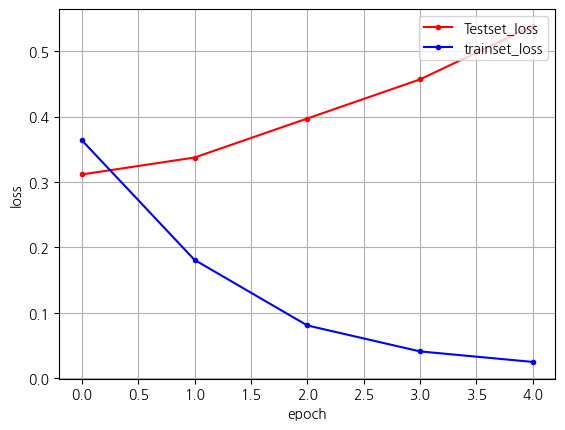

In [53]:
y_val_loss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# RNN, LSTM